In [1]:
import cv2
import os
import matplotlib.pyplot as plt

StatementMeta(, , , Waiting, )

In [ ]:
os.listdir("/lakehouse/default/Files/BreastTumor")

StatementMeta(, , , Waiting, )

['benign', 'malignant', 'normal']

In [ ]:
def import_images(folder,target):
    images = []
    for item in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,item),0)
        if img is not None:
            images.append([img,target])
    return images

StatementMeta(, , , Waiting, )

In [ ]:
bengin = import_images("/lakehouse/default/Files/BreastTumor/benign/",0)
malignant = import_images("/lakehouse/default/Files/BreastTumor/malignant/",1)
normal = import_images("/lakehouse/default/Files/BreastTumor/normal/",2)

StatementMeta(, , , Waiting, )

In [ ]:
bengin.extend(malignant)
bengin.extend(normal)

StatementMeta(, , , Waiting, )

StatementMeta(, , , Waiting, )

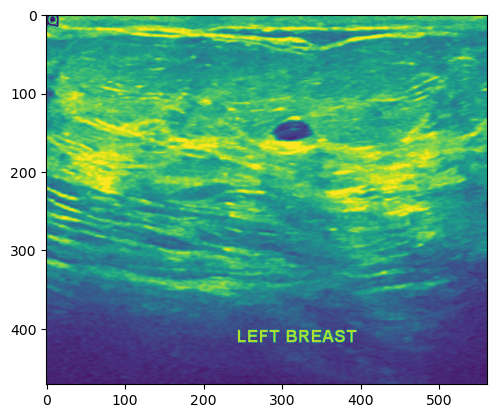

In [ ]:
plt.imshow(bengin[0][0])

In [ ]:
full_data = bengin

StatementMeta(, , , Waiting, )

In [ ]:
feature_matrix = []
label = []
for x,y in full_data:
    feature_matrix.append(x)
    label.append(y)

StatementMeta(, , , Waiting, )

In [ ]:
feature_matrix[0]

StatementMeta(, , , Waiting, )

array([[  7,   2,   4, ..., 197, 184, 176],
       [198,  45,   0, ..., 200, 191, 183],
       [212,  45,   9, ..., 207, 203, 194],
       ...,
       [ 25,  24,  23, ...,  22,  27,  26],
       [ 24,  23,  23, ...,  30,  32,  31],
       [ 26,  25,  25, ...,  34,  34,  32]], dtype=uint8)

StatementMeta(, , , Waiting, )

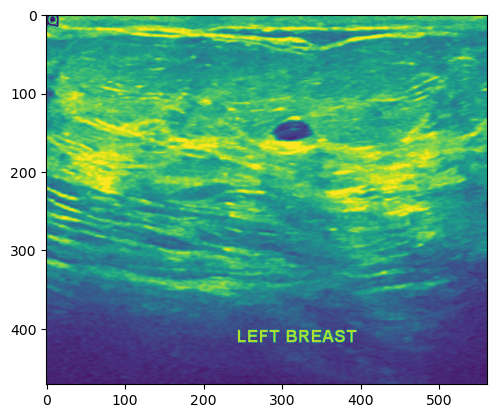

In [ ]:
plt.imshow(feature_matrix[0])

In [ ]:
label[0]

StatementMeta(, , , Waiting, )

0

In [ ]:
## resiized image
X=[]
img_size=128

for x in feature_matrix:
    new_array = cv2.resize(x,(img_size,img_size))
    X.append(new_array)
    

StatementMeta(, , , Waiting, )

StatementMeta(, , , Waiting, )

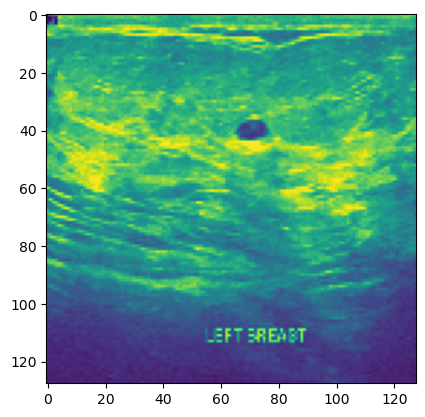

In [ ]:
plt.imshow(X[0])

In [ ]:
X_corrected = []
for image in X:
    image = image/255
    X_corrected.append(image)

StatementMeta(, , , Waiting, )

StatementMeta(, , , Waiting, )

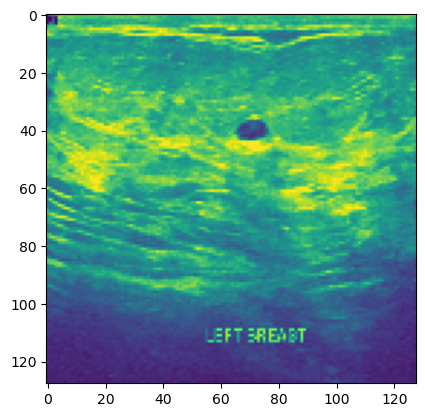

In [ ]:
plt.imshow(X_corrected[0])


In [ ]:
import numpy as np
np.array(X_corrected).shape

StatementMeta(, , , Waiting, )

(1578, 128, 128)

In [ ]:
X_M = np.array(X_corrected)

StatementMeta(, , , Waiting, )

In [ ]:
X_M.shape[1]

StatementMeta(, , , Waiting, )

128

In [ ]:
print(np.array(X_corrected).shape)
print(np.array(X_corrected).shape[0])
print(np.array(X_corrected).shape[1])
print(np.array(X_corrected).shape[2])


StatementMeta(, , , Waiting, )

(1578, 128, 128)
1578
128
128


(1578, 128, 128)
1578
128
128


(1578, 128, 128)
1578
128
128


In [ ]:
X_M_R =X_M.reshape(X_M.shape[0],X_M.shape[1],X_M.shape[2],1)

StatementMeta(, , , Waiting, )

In [ ]:
X_M_R.shape

StatementMeta(, , , Waiting, )

(1578, 128, 128, 1)

In [ ]:
from sklearn.model_selection import train_test_split

StatementMeta(, , , Waiting, )

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_M_R,label)

StatementMeta(, , , Waiting, )

In [ ]:
import sys
from keras.utils import to_categorical
from keras.models import Sequential ###
from keras.layers import Conv2D    ####
from keras.layers import MaxPooling2D  ###
from keras.layers import Dense   ###
from keras.layers import Flatten ###
from keras.optimizers import SGD
from keras.optimizers import Adam ####

StatementMeta(, , , Waiting, )

2024-03-04 01:02:44.351930: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-04 01:02:48.827992: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2024-03-04 01:02:44.351930: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-04 01:02:48.827992: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2024-03-04 01:02:44.351930: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-04 01:02:48.827992: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(128, 128,1)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(3, activation='softmax'))
    #compile model
    opt = Adam(lr=0.001)
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

## sparse_categorical_crossentropy

StatementMeta(, , , Waiting, )

In [ ]:


model =  define_model()
history = model.fit(np.array(X_train),np.array(y_train), epochs=25,validation_data=(X_test, np.array(y_test)))

StatementMeta(, , , Waiting, )

/home/trusted-service-user/cluster-env/clonedenv/lib/python3.10/site-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


/home/trusted-service-user/cluster-env/clonedenv/lib/python3.10/site-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


/home/trusted-service-user/cluster-env/clonedenv/lib/python3.10/site-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/25


Epoch 1/25


Epoch 1/25


 2/37 [>.............................] - ETA: 13s - loss: 2.5760 - accuracy: 0.5000 

 2/37 [>.............................] - ETA: 13s - loss: 2.5760 - accuracy: 0.5000 

 7/37 [====>.........................] - ETA: 11s - loss: 1.4626 - accuracy: 0.4554

 2/37 [>.............................] - ETA: 13s - loss: 2.5760 - accuracy: 0.5000 

 7/37 [====>.........................] - ETA: 11s - loss: 1.4626 - accuracy: 0.4554

 7/37 [====>.........................] - ETA: 11s - loss: 1.4626 - accuracy: 0.4554

12/37 [========>.....................] - ETA: 9s - loss: 1.2546 - accuracy: 0.4870 

12/37 [========>.....................] - ETA: 9s - loss: 1.2546 - accuracy: 0.4870 

12/37 [========>.....................] - ETA: 9s - loss: 1.2546 - accuracy: 0.4870 

15/37 [===========>..................] - ETA: 8s - loss: 1.1733 - accuracy: 0.5104

18/37 [=============>................] - ETA: 7s - loss: 1.1411 - accuracy: 0.5000

18/37 [=============>................] - ETA: 7s - loss: 1.1411 - accuracy: 0.5000

18/37 [=============>................] - ETA: 7s - loss: 1.1411 - accuracy: 0.5000

21/37 [================>.............] - ETA: 6s - loss: 1.1076 - accuracy: 0.5060

24/37 [==================>...........] - ETA: 5s - loss: 1.0750 - accuracy: 0.5299

24/37 [==================>...........] - ETA: 5s - loss: 1.0750 - accuracy: 0.5299

24/37 [==================>...........] - ETA: 5s - loss: 1.0750 - accuracy: 0.5299

28/37 [=====================>........] - ETA: 3s - loss: 1.0447 - accuracy: 0.5379

29/37 [======================>.......] - ETA: 3s - loss: 1.0401 - accuracy: 0.5388

29/37 [======================>.......] - ETA: 3s - loss: 1.0401 - accuracy: 0.5388

29/37 [======================>.......] - ETA: 3s - loss: 1.0401 - accuracy: 0.5388

35/37 [===========================>..] - ETA: 0s - loss: 0.9959 - accuracy: 0.5643

35/37 [===========================>..] - ETA: 0s - loss: 0.9959 - accuracy: 0.5643

35/37 [===========================>..] - ETA: 0s - loss: 0.9959 - accuracy: 0.5643

37/37 [==============================] - ETA: 0s - loss: 0.9868 - accuracy: 0.5697

37/37 [==============================] - ETA: 0s - loss: 0.9868 - accuracy: 0.5697

37/37 [==============================] - ETA: 0s - loss: 0.9868 - accuracy: 0.5697

37/37 [==============================] - 20s 444ms/step - loss: 0.9868 - accuracy: 0.5697 - val_loss: 0.7572 - val_accuracy: 0.7215
Epoch 2/25
 1/37 [..............................] - ETA: 14s - loss: 0.7671 - accuracy: 0.7812

37/37 [==============================] - 20s 444ms/step - loss: 0.9868 - accuracy: 0.5697 - val_loss: 0.7572 - val_accuracy: 0.7215
Epoch 2/25
 1/37 [..............................] - ETA: 14s - loss: 0.7671 - accuracy: 0.7812

37/37 [==============================] - 20s 444ms/step - loss: 0.9868 - accuracy: 0.5697 - val_loss: 0.7572 - val_accuracy: 0.7215
Epoch 2/25
 1/37 [..............................] - ETA: 14s - loss: 0.7671 - accuracy: 0.7812

 5/37 [===>..........................] - ETA: 11s - loss: 0.7630 - accuracy: 0.6938

 5/37 [===>..........................] - ETA: 11s - loss: 0.7630 - accuracy: 0.6938

 5/37 [===>..........................] - ETA: 11s - loss: 0.7630 - accuracy: 0.6938

10/37 [=======>......................] - ETA: 10s - loss: 0.7689 - accuracy: 0.6844

10/37 [=======>......................] - ETA: 10s - loss: 0.7689 - accuracy: 0.6844

10/37 [=======>......................] - ETA: 10s - loss: 0.7689 - accuracy: 0.6844

16/37 [===========>..................] - ETA: 8s - loss: 0.7929 - accuracy: 0.6660

16/37 [===========>..................] - ETA: 8s - loss: 0.7929 - accuracy: 0.6660

16/37 [===========>..................] - ETA: 8s - loss: 0.7929 - accuracy: 0.6660

22/37 [================>.............] - ETA: 5s - loss: 0.7893 - accuracy: 0.6648

22/37 [================>.............] - ETA: 5s - loss: 0.7893 - accuracy: 0.6648

22/37 [================>.............] - ETA: 5s - loss: 0.7893 - accuracy: 0.6648

28/37 [=====================>........] - ETA: 3s - loss: 0.7815 - accuracy: 0.6674

28/37 [=====================>........] - ETA: 3s - loss: 0.7815 - accuracy: 0.6674

28/37 [=====================>........] - ETA: 3s - loss: 0.7815 - accuracy: 0.6674

34/37 [==========================>...] - ETA: 1s - loss: 0.7786 - accuracy: 0.6645

34/37 [==========================>...] - ETA: 1s - loss: 0.7786 - accuracy: 0.6645

34/37 [==========================>...] - ETA: 1s - loss: 0.7786 - accuracy: 0.6645

37/37 [==============================] - ETA: 0s - loss: 0.7704 - accuracy: 0.6695

37/37 [==============================] - ETA: 0s - loss: 0.7704 - accuracy: 0.6695

37/37 [==============================] - ETA: 0s - loss: 0.7704 - accuracy: 0.6695

37/37 [==============================] - 16s 438ms/step - loss: 0.7704 - accuracy: 0.6695 - val_loss: 0.7604 - val_accuracy: 0.6937
Epoch 3/25
 3/37 [=>............................] - ETA: 13s - loss: 0.7743 - accuracy: 0.5938

37/37 [==============================] - 16s 438ms/step - loss: 0.7704 - accuracy: 0.6695 - val_loss: 0.7604 - val_accuracy: 0.6937
Epoch 3/25
 3/37 [=>............................] - ETA: 13s - loss: 0.7743 - accuracy: 0.5938

37/37 [==============================] - 16s 438ms/step - loss: 0.7704 - accuracy: 0.6695 - val_loss: 0.7604 - val_accuracy: 0.6937
Epoch 3/25
 3/37 [=>............................] - ETA: 13s - loss: 0.7743 - accuracy: 0.5938

 7/37 [====>.........................] - ETA: 11s - loss: 0.7836 - accuracy: 0.5982

 9/37 [======>.......................] - ETA: 10s - loss: 0.7602 - accuracy: 0.6250

 9/37 [======>.......................] - ETA: 10s - loss: 0.7602 - accuracy: 0.6250

 9/37 [======>.......................] - ETA: 10s - loss: 0.7602 - accuracy: 0.6250

12/37 [========>.....................] - ETA: 9s - loss: 0.7316 - accuracy: 0.6406 

15/37 [===========>..................] - ETA: 8s - loss: 0.7295 - accuracy: 0.6500

15/37 [===========>..................] - ETA: 8s - loss: 0.7295 - accuracy: 0.6500

15/37 [===========>..................] - ETA: 8s - loss: 0.7295 - accuracy: 0.6500

18/37 [=============>................] - ETA: 7s - loss: 0.7335 - accuracy: 0.6441

21/37 [================>.............] - ETA: 6s - loss: 0.7273 - accuracy: 0.6488

21/37 [================>.............] - ETA: 6s - loss: 0.7273 - accuracy: 0.6488

21/37 [================>.............] - ETA: 6s - loss: 0.7273 - accuracy: 0.6488

24/37 [==================>...........] - ETA: 5s - loss: 0.7256 - accuracy: 0.6523

26/37 [====================>.........] - ETA: 4s - loss: 0.7160 - accuracy: 0.6587

26/37 [====================>.........] - ETA: 4s - loss: 0.7160 - accuracy: 0.6587

26/37 [====================>.........] - ETA: 4s - loss: 0.7160 - accuracy: 0.6587

29/37 [======================>.......] - ETA: 3s - loss: 0.7084 - accuracy: 0.6627

32/37 [========================>.....] - ETA: 1s - loss: 0.7085 - accuracy: 0.6641

32/37 [========================>.....] - ETA: 1s - loss: 0.7085 - accuracy: 0.6641

32/37 [========================>.....] - ETA: 1s - loss: 0.7085 - accuracy: 0.6641

35/37 [===========================>..] - ETA: 0s - loss: 0.7025 - accuracy: 0.6679

35/37 [===========================>..] - ETA: 0s - loss: 0.7025 - accuracy: 0.6679

35/37 [===========================>..] - ETA: 0s - loss: 0.7025 - accuracy: 0.6679

37/37 [==============================] - ETA: 0s - loss: 0.7014 - accuracy: 0.6669

37/37 [==============================] - ETA: 0s - loss: 0.7014 - accuracy: 0.6669

37/37 [==============================] - ETA: 0s - loss: 0.7014 - accuracy: 0.6669

37/37 [==============================] - 16s 437ms/step - loss: 0.7014 - accuracy: 0.6669 - val_loss: 0.6396 - val_accuracy: 0.7063
Epoch 4/25
 1/37 [..............................] - ETA: 13s - loss: 0.7456 - accuracy: 0.5938

 2/37 [>.............................] - ETA: 13s - loss: 0.6013 - accuracy: 0.6875

37/37 [==============================] - 16s 437ms/step - loss: 0.7014 - accuracy: 0.6669 - val_loss: 0.6396 - val_accuracy: 0.7063
Epoch 4/25
 2/37 [>.............................] - ETA: 13s - loss: 0.6013 - accuracy: 0.6875

37/37 [==============================] - 16s 437ms/step - loss: 0.7014 - accuracy: 0.6669 - val_loss: 0.6396 - val_accuracy: 0.7063
Epoch 4/25
 2/37 [>.............................] - ETA: 13s - loss: 0.6013 - accuracy: 0.6875

 5/37 [===>..........................] - ETA: 12s - loss: 0.6145 - accuracy: 0.6938

 8/37 [=====>........................] - ETA: 11s - loss: 0.6469 - accuracy: 0.6914

 8/37 [=====>........................] - ETA: 11s - loss: 0.6469 - accuracy: 0.6914

 8/37 [=====>........................] - ETA: 11s - loss: 0.6469 - accuracy: 0.6914

11/37 [=======>......................] - ETA: 9s - loss: 0.6457 - accuracy: 0.6818 

14/37 [==========>...................] - ETA: 8s - loss: 0.6506 - accuracy: 0.6741

14/37 [==========>...................] - ETA: 8s - loss: 0.6506 - accuracy: 0.6741

14/37 [==========>...................] - ETA: 8s - loss: 0.6506 - accuracy: 0.6741

17/37 [============>.................] - ETA: 7s - loss: 0.6444 - accuracy: 0.6691

19/37 [==============>...............] - ETA: 6s - loss: 0.6447 - accuracy: 0.6743

19/37 [==============>...............] - ETA: 6s - loss: 0.6447 - accuracy: 0.6743

19/37 [==============>...............] - ETA: 6s - loss: 0.6447 - accuracy: 0.6743

22/37 [================>.............] - ETA: 5s - loss: 0.6375 - accuracy: 0.6875

25/37 [===================>..........] - ETA: 4s - loss: 0.6376 - accuracy: 0.6888

25/37 [===================>..........] - ETA: 4s - loss: 0.6376 - accuracy: 0.6888

25/37 [===================>..........] - ETA: 4s - loss: 0.6376 - accuracy: 0.6888

28/37 [=====================>........] - ETA: 3s - loss: 0.6320 - accuracy: 0.6920

31/37 [========================>.....] - ETA: 2s - loss: 0.6351 - accuracy: 0.6915

31/37 [========================>.....] - ETA: 2s - loss: 0.6351 - accuracy: 0.6915

31/37 [========================>.....] - ETA: 2s - loss: 0.6351 - accuracy: 0.6915

34/37 [==========================>...] - ETA: 1s - loss: 0.6358 - accuracy: 0.6912

37/37 [==============================] - ETA: 0s - loss: 0.6370 - accuracy: 0.6932

37/37 [==============================] - ETA: 0s - loss: 0.6370 - accuracy: 0.6932

37/37 [==============================] - 16s 436ms/step - loss: 0.6370 - accuracy: 0.6932 - val_loss: 0.6563 - val_accuracy: 0.7190
Epoch 5/25
 1/37 [..............................] - ETA: 12s - loss: 0.7331 - accuracy: 0.6250

37/37 [==============================] - 16s 436ms/step - loss: 0.6370 - accuracy: 0.6932 - val_loss: 0.6563 - val_accuracy: 0.7190
Epoch 5/25
 1/37 [..............................] - ETA: 12s - loss: 0.7331 - accuracy: 0.6250

 2/37 [>.............................] - ETA: 13s - loss: 0.7741 - accuracy: 0.6250

37/37 [==============================] - 16s 436ms/step - loss: 0.6370 - accuracy: 0.6932 - val_loss: 0.6563 - val_accuracy: 0.7190
Epoch 5/25
 2/37 [>.............................] - ETA: 13s - loss: 0.7741 - accuracy: 0.6250

 5/37 [===>..........................] - ETA: 12s - loss: 0.7011 - accuracy: 0.7000

 8/37 [=====>........................] - ETA: 11s - loss: 0.6337 - accuracy: 0.7227

 8/37 [=====>........................] - ETA: 11s - loss: 0.6337 - accuracy: 0.7227

 8/37 [=====>........................] - ETA: 11s - loss: 0.6337 - accuracy: 0.7227

 9/37 [======>.......................] - ETA: 10s - loss: 0.6309 - accuracy: 0.7153

 9/37 [======>.......................] - ETA: 10s - loss: 0.6309 - accuracy: 0.7153

12/37 [========>.....................] - ETA: 9s - loss: 0.6569 - accuracy: 0.7057 

16/37 [===========>..................] - ETA: 8s - loss: 0.6506 - accuracy: 0.6914

16/37 [===========>..................] - ETA: 8s - loss: 0.6506 - accuracy: 0.6914

16/37 [===========>..................] - ETA: 8s - loss: 0.6506 - accuracy: 0.6914

19/37 [==============>...............] - ETA: 6s - loss: 0.6464 - accuracy: 0.6974

22/37 [================>.............] - ETA: 5s - loss: 0.6432 - accuracy: 0.7017

22/37 [================>.............] - ETA: 5s - loss: 0.6432 - accuracy: 0.7017

24/37 [==================>...........] - ETA: 5s - loss: 0.6311 - accuracy: 0.7057

24/37 [==================>...........] - ETA: 5s - loss: 0.6311 - accuracy: 0.7057

24/37 [==================>...........] - ETA: 5s - loss: 0.6311 - accuracy: 0.7057

27/37 [====================>.........] - ETA: 3s - loss: 0.6264 - accuracy: 0.7130

30/37 [=======================>......] - ETA: 2s - loss: 0.6354 - accuracy: 0.7031

33/37 [=========================>....] - ETA: 1s - loss: 0.6317 - accuracy: 0.7055

33/37 [=========================>....] - ETA: 1s - loss: 0.6317 - accuracy: 0.7055

33/37 [=========================>....] - ETA: 1s - loss: 0.6317 - accuracy: 0.7055

36/37 [============================>.] - ETA: 0s - loss: 0.6244 - accuracy: 0.7101

37/37 [==============================] - 16s 433ms/step - loss: 0.6266 - accuracy: 0.7092 - val_loss: 0.6680 - val_accuracy: 0.7038
Epoch 6/25


37/37 [==============================] - 16s 433ms/step - loss: 0.6266 - accuracy: 0.7092 - val_loss: 0.6680 - val_accuracy: 0.7038
Epoch 6/25


 3/37 [=>............................] - ETA: 12s - loss: 0.4385 - accuracy: 0.7917

37/37 [==============================] - 16s 433ms/step - loss: 0.6266 - accuracy: 0.7092 - val_loss: 0.6680 - val_accuracy: 0.7038
Epoch 6/25
 3/37 [=>............................] - ETA: 12s - loss: 0.4385 - accuracy: 0.7917

 6/37 [===>..........................] - ETA: 11s - loss: 0.5581 - accuracy: 0.7552

 9/37 [======>.......................] - ETA: 10s - loss: 0.5772 - accuracy: 0.7500

 9/37 [======>.......................] - ETA: 10s - loss: 0.5772 - accuracy: 0.7500

 9/37 [======>.......................] - ETA: 10s - loss: 0.5772 - accuracy: 0.7500

12/37 [========>.....................] - ETA: 9s - loss: 0.5947 - accuracy: 0.7474

16/37 [===========>..................] - ETA: 7s - loss: 0.5767 - accuracy: 0.7559

16/37 [===========>..................] - ETA: 7s - loss: 0.5767 - accuracy: 0.7559

20/37 [===============>..............] - ETA: 6s - loss: 0.6104 - accuracy: 0.7547

16/37 [===========>..................] - ETA: 7s - loss: 0.5767 - accuracy: 0.7559

20/37 [===============>..............] - ETA: 6s - loss: 0.6104 - accuracy: 0.7547

20/37 [===============>..............] - ETA: 6s - loss: 0.6104 - accuracy: 0.7547

24/37 [==================>...........] - ETA: 4s - loss: 0.6098 - accuracy: 0.7526

28/37 [=====================>........] - ETA: 3s - loss: 0.6131 - accuracy: 0.7400

28/37 [=====================>........] - ETA: 3s - loss: 0.6131 - accuracy: 0.7400

28/37 [=====================>........] - ETA: 3s - loss: 0.6131 - accuracy: 0.7400

30/37 [=======================>......] - ETA: 2s - loss: 0.6080 - accuracy: 0.7427

30/37 [=======================>......] - ETA: 2s - loss: 0.6080 - accuracy: 0.7427

30/37 [=======================>......] - ETA: 2s - loss: 0.6080 - accuracy: 0.7427

33/37 [=========================>....] - ETA: 1s - loss: 0.5998 - accuracy: 0.7472

37/37 [==============================] - ETA: 0s - loss: 0.5985 - accuracy: 0.7456

37/37 [==============================] - ETA: 0s - loss: 0.5985 - accuracy: 0.7456

37/37 [==============================] - ETA: 0s - loss: 0.5985 - accuracy: 0.7456

37/37 [==============================] - 16s 431ms/step - loss: 0.5985 - accuracy: 0.7456 - val_loss: 0.5705 - val_accuracy: 0.7494
Epoch 7/25


 4/37 [==>...........................] - ETA: 13s - loss: 0.5616 - accuracy: 0.7266

 9/37 [======>.......................] - ETA: 11s - loss: 0.5052 - accuracy: 0.7604

37/37 [==============================] - 16s 431ms/step - loss: 0.5985 - accuracy: 0.7456 - val_loss: 0.5705 - val_accuracy: 0.7494
Epoch 7/25
 9/37 [======>.......................] - ETA: 11s - loss: 0.5052 - accuracy: 0.7604

37/37 [==============================] - 16s 431ms/step - loss: 0.5985 - accuracy: 0.7456 - val_loss: 0.5705 - val_accuracy: 0.7494
Epoch 7/25
 9/37 [======>.......................] - ETA: 11s - loss: 0.5052 - accuracy: 0.7604

11/37 [=======>......................] - ETA: 10s - loss: 0.4881 - accuracy: 0.7727

14/37 [==========>...................] - ETA: 9s - loss: 0.4838 - accuracy: 0.7790

17/37 [============>.................] - ETA: 7s - loss: 0.4973 - accuracy: 0.7684

23/37 [=================>............] - ETA: 5s - loss: 0.4927 - accuracy: 0.7704

17/37 [============>.................] - ETA: 7s - loss: 0.4973 - accuracy: 0.7684

17/37 [============>.................] - ETA: 7s - loss: 0.4973 - accuracy: 0.7684

23/37 [=================>............] - ETA: 5s - loss: 0.4927 - accuracy: 0.7704

26/37 [====================>.........] - ETA: 4s - loss: 0.4985 - accuracy: 0.7704

26/37 [====================>.........] - ETA: 4s - loss: 0.4985 - accuracy: 0.7704

29/37 [======================>.......] - ETA: 3s - loss: 0.4884 - accuracy: 0.7791

32/37 [========================>.....] - ETA: 1s - loss: 0.4825 - accuracy: 0.7773

32/37 [========================>.....] - ETA: 1s - loss: 0.4825 - accuracy: 0.7773

35/37 [===========================>..] - ETA: 0s - loss: 0.4626 - accuracy: 0.7893

35/37 [===========================>..] - ETA: 0s - loss: 0.4626 - accuracy: 0.7893

37/37 [==============================] - 16s 439ms/step - loss: 0.4618 - accuracy: 0.7895 - val_loss: 0.6170 - val_accuracy: 0.7595


37/37 [==============================] - 16s 439ms/step - loss: 0.4618 - accuracy: 0.7895 - val_loss: 0.6170 - val_accuracy: 0.7595


Epoch 8/25
 1/37 [..............................] - ETA: 14s - loss: 0.2708 - accuracy: 0.8750

 5/37 [===>..........................] - ETA: 12s - loss: 0.2800 - accuracy: 0.8875

37/37 [==============================] - 16s 439ms/step - loss: 0.4618 - accuracy: 0.7895 - val_loss: 0.6170 - val_accuracy: 0.7595
Epoch 8/25
 5/37 [===>..........................] - ETA: 12s - loss: 0.2800 - accuracy: 0.8875

 7/37 [====>.........................] - ETA: 11s - loss: 0.3268 - accuracy: 0.8705

Epoch 8/25
 7/37 [====>.........................] - ETA: 11s - loss: 0.3268 - accuracy: 0.8705

 9/37 [======>.......................] - ETA: 10s - loss: 0.3356 - accuracy: 0.8785

11/37 [=======>......................] - ETA: 9s - loss: 0.3709 - accuracy: 0.8551 

13/37 [=========>....................] - ETA: 9s - loss: 0.3619 - accuracy: 0.8582

13/37 [=========>....................] - ETA: 9s - loss: 0.3619 - accuracy: 0.8582

16/37 [===========>..................] - ETA: 7s - loss: 0.3854 - accuracy: 0.8516

16/37 [===========>..................] - ETA: 7s - loss: 0.3854 - accuracy: 0.8516

19/37 [==============>...............] - ETA: 6s - loss: 0.3757 - accuracy: 0.8520

21/37 [================>.............] - ETA: 6s - loss: 0.3843 - accuracy: 0.8512

21/37 [================>.............] - ETA: 6s - loss: 0.3843 - accuracy: 0.8512

25/37 [===================>..........] - ETA: 4s - loss: 0.3936 - accuracy: 0.8487

25/37 [===================>..........] - ETA: 4s - loss: 0.3936 - accuracy: 0.8487

32/37 [========================>.....] - ETA: 1s - loss: 0.3983 - accuracy: 0.8389

32/37 [========================>.....] - ETA: 1s - loss: 0.3983 - accuracy: 0.8389

35/37 [===========================>..] - ETA: 0s - loss: 0.3959 - accuracy: 0.8402

35/37 [===========================>..] - ETA: 0s - loss: 0.3959 - accuracy: 0.8402

37/37 [==============================] - 16s 429ms/step - loss: 0.3951 - accuracy: 0.8428 - val_loss: 0.5481 - val_accuracy: 0.7747
Epoch 9/25
 4/37 [==>...........................] - ETA: 12s - loss: 0.2480 - accuracy: 0.8750

37/37 [==============================] - 16s 429ms/step - loss: 0.3951 - accuracy: 0.8428 - val_loss: 0.5481 - val_accuracy: 0.7747
Epoch 9/25
 4/37 [==>...........................] - ETA: 12s - loss: 0.2480 - accuracy: 0.8750

 7/37 [====>.........................] - ETA: 11s - loss: 0.3123 - accuracy: 0.8705

37/37 [==============================] - 16s 429ms/step - loss: 0.3951 - accuracy: 0.8428 - val_loss: 0.5481 - val_accuracy: 0.7747
Epoch 9/25
 7/37 [====>.........................] - ETA: 11s - loss: 0.3123 - accuracy: 0.8705

13/37 [=========>....................] - ETA: 9s - loss: 0.3025 - accuracy: 0.8750

13/37 [=========>....................] - ETA: 9s - loss: 0.3025 - accuracy: 0.8750

20/37 [===============>..............] - ETA: 6s - loss: 0.3165 - accuracy: 0.8781

20/37 [===============>..............] - ETA: 6s - loss: 0.3165 - accuracy: 0.8781

21/37 [================>.............] - ETA: 6s - loss: 0.3232 - accuracy: 0.8735

21/37 [================>.............] - ETA: 6s - loss: 0.3232 - accuracy: 0.8735

28/37 [=====================>........] - ETA: 3s - loss: 0.3343 - accuracy: 0.8683

28/37 [=====================>........] - ETA: 3s - loss: 0.3343 - accuracy: 0.8683

34/37 [==========================>...] - ETA: 1s - loss: 0.3336 - accuracy: 0.8676

34/37 [==========================>...] - ETA: 1s - loss: 0.3336 - accuracy: 0.8676

37/37 [==============================] - 16s 424ms/step - loss: 0.3324 - accuracy: 0.8673 - val_loss: 0.5935 - val_accuracy: 0.7924
Epoch 10/25


37/37 [==============================] - 16s 424ms/step - loss: 0.3324 - accuracy: 0.8673 - val_loss: 0.5935 - val_accuracy: 0.7924
Epoch 10/25


37/37 [==============================] - 16s 424ms/step - loss: 0.3324 - accuracy: 0.8673 - val_loss: 0.5935 - val_accuracy: 0.7924
Epoch 10/25


 7/37 [====>.........................] - ETA: 11s - loss: 0.3813 - accuracy: 0.8661

 7/37 [====>.........................] - ETA: 11s - loss: 0.3813 - accuracy: 0.8661

10/37 [=======>......................] - ETA: 10s - loss: 0.3403 - accuracy: 0.8750

10/37 [=======>......................] - ETA: 10s - loss: 0.3403 - accuracy: 0.8750

17/37 [============>.................] - ETA: 7s - loss: 0.2983 - accuracy: 0.8842

17/37 [============>.................] - ETA: 7s - loss: 0.2983 - accuracy: 0.8842

21/37 [================>.............] - ETA: 6s - loss: 0.2862 - accuracy: 0.8839

21/37 [================>.............] - ETA: 6s - loss: 0.2862 - accuracy: 0.8839

21/37 [================>.............] - ETA: 6s - loss: 0.2862 - accuracy: 0.8839

28/37 [=====================>........] - ETA: 3s - loss: 0.2729 - accuracy: 0.8940

28/37 [=====================>........] - ETA: 3s - loss: 0.2729 - accuracy: 0.8940

34/37 [==========================>...] - ETA: 1s - loss: 0.2484 - accuracy: 0.9072

34/37 [==========================>...] - ETA: 1s - loss: 0.2484 - accuracy: 0.9072

36/37 [============================>.] - ETA: 0s - loss: 0.2453 - accuracy: 0.9089

36/37 [============================>.] - ETA: 0s - loss: 0.2453 - accuracy: 0.9089

37/37 [==============================] - 16s 430ms/step - loss: 0.2440 - accuracy: 0.9096 - val_loss: 0.6839 - val_accuracy: 0.7899
Epoch 11/25


 5/37 [===>..........................] - ETA: 12s - loss: 0.1934 - accuracy: 0.9187

 6/37 [===>..........................] - ETA: 12s - loss: 0.1868 - accuracy: 0.9219

37/37 [==============================] - 16s 430ms/step - loss: 0.2440 - accuracy: 0.9096 - val_loss: 0.6839 - val_accuracy: 0.7899
Epoch 11/25
 5/37 [===>..........................] - ETA: 12s - loss: 0.1934 - accuracy: 0.9187

37/37 [==============================] - 16s 430ms/step - loss: 0.2440 - accuracy: 0.9096 - val_loss: 0.6839 - val_accuracy: 0.7899
Epoch 11/25
 5/37 [===>..........................] - ETA: 12s - loss: 0.1934 - accuracy: 0.9187

 6/37 [===>..........................] - ETA: 12s - loss: 0.1868 - accuracy: 0.9219

12/37 [========>.....................] - ETA: 9s - loss: 0.1752 - accuracy: 0.9297 

12/37 [========>.....................] - ETA: 9s - loss: 0.1752 - accuracy: 0.9297 

19/37 [==============>...............] - ETA: 7s - loss: 0.1677 - accuracy: 0.9342

19/37 [==============>...............] - ETA: 7s - loss: 0.1677 - accuracy: 0.9342

20/37 [===============>..............] - ETA: 6s - loss: 0.1661 - accuracy: 0.9344

20/37 [===============>..............] - ETA: 6s - loss: 0.1661 - accuracy: 0.9344

23/37 [=================>............] - ETA: 5s - loss: 0.1638 - accuracy: 0.9334

23/37 [=================>............] - ETA: 5s - loss: 0.1638 - accuracy: 0.9334

30/37 [=======================>......] - ETA: 2s - loss: 0.2176 - accuracy: 0.9177

30/37 [=======================>......] - ETA: 2s - loss: 0.2176 - accuracy: 0.9177

33/37 [=========================>....] - ETA: 1s - loss: 0.2158 - accuracy: 0.9214

33/37 [=========================>....] - ETA: 1s - loss: 0.2158 - accuracy: 0.9214

37/37 [==============================] - 16s 436ms/step - loss: 0.2190 - accuracy: 0.9197 - val_loss: 0.5932 - val_accuracy: 0.8051
Epoch 12/25
 2/37 [>.............................] - ETA: 12s - loss: 0.1343 - accuracy: 0.9688

37/37 [==============================] - 16s 436ms/step - loss: 0.2190 - accuracy: 0.9197 - val_loss: 0.5932 - val_accuracy: 0.8051
Epoch 12/25
 2/37 [>.............................] - ETA: 12s - loss: 0.1343 - accuracy: 0.9688

 5/37 [===>..........................] - ETA: 11s - loss: 0.1161 - accuracy: 0.9688

37/37 [==============================] - 16s 436ms/step - loss: 0.2190 - accuracy: 0.9197 - val_loss: 0.5932 - val_accuracy: 0.8051
Epoch 12/25
 5/37 [===>..........................] - ETA: 11s - loss: 0.1161 - accuracy: 0.9688

 5/37 [===>..........................] - ETA: 11s - loss: 0.1161 - accuracy: 0.9688

12/37 [========>.....................] - ETA: 9s - loss: 0.1533 - accuracy: 0.9531 

19/37 [==============>...............] - ETA: 6s - loss: 0.1589 - accuracy: 0.9457

19/37 [==============>...............] - ETA: 6s - loss: 0.1589 - accuracy: 0.9457

19/37 [==============>...............] - ETA: 6s - loss: 0.1589 - accuracy: 0.9457

26/37 [====================>.........] - ETA: 4s - loss: 0.1572 - accuracy: 0.9411

26/37 [====================>.........] - ETA: 4s - loss: 0.1572 - accuracy: 0.9411

33/37 [=========================>....] - ETA: 1s - loss: 0.1811 - accuracy: 0.9337

33/37 [=========================>....] - ETA: 1s - loss: 0.1811 - accuracy: 0.9337

37/37 [==============================] - 16s 431ms/step - loss: 0.1760 - accuracy: 0.9349 - val_loss: 0.7172 - val_accuracy: 0.8000
Epoch 13/25
 2/37 [>.............................] - ETA: 12s - loss: 0.1185 - accuracy: 0.9531

37/37 [==============================] - 16s 431ms/step - loss: 0.1760 - accuracy: 0.9349 - val_loss: 0.7172 - val_accuracy: 0.8000
Epoch 13/25
 2/37 [>.............................] - ETA: 12s - loss: 0.1185 - accuracy: 0.9531

 5/37 [===>..........................] - ETA: 12s - loss: 0.1092 - accuracy: 0.9625

37/37 [==============================] - 16s 431ms/step - loss: 0.1760 - accuracy: 0.9349 - val_loss: 0.7172 - val_accuracy: 0.8000
Epoch 13/25
 5/37 [===>..........................] - ETA: 12s - loss: 0.1092 - accuracy: 0.9625

 9/37 [======>.......................] - ETA: 10s - loss: 0.1188 - accuracy: 0.9583

 9/37 [======>.......................] - ETA: 10s - loss: 0.1188 - accuracy: 0.9583

12/37 [========>.....................] - ETA: 9s - loss: 0.1051 - accuracy: 0.9635 

12/37 [========>.....................] - ETA: 9s - loss: 0.1051 - accuracy: 0.9635 

15/37 [===========>..................] - ETA: 8s - loss: 0.1002 - accuracy: 0.9604

17/37 [============>.................] - ETA: 7s - loss: 0.1137 - accuracy: 0.9596

17/37 [============>.................] - ETA: 7s - loss: 0.1137 - accuracy: 0.9596

17/37 [============>.................] - ETA: 7s - loss: 0.1137 - accuracy: 0.9596

18/37 [=============>................] - ETA: 7s - loss: 0.1135 - accuracy: 0.9601

18/37 [=============>................] - ETA: 7s - loss: 0.1135 - accuracy: 0.9601

25/37 [===================>..........] - ETA: 4s - loss: 0.1347 - accuracy: 0.9538

25/37 [===================>..........] - ETA: 4s - loss: 0.1347 - accuracy: 0.9538

32/37 [========================>.....] - ETA: 1s - loss: 0.1345 - accuracy: 0.9502

32/37 [========================>.....] - ETA: 1s - loss: 0.1345 - accuracy: 0.9502

37/37 [==============================] - 16s 427ms/step - loss: 0.1342 - accuracy: 0.9493 - val_loss: 0.8131 - val_accuracy: 0.7949


37/37 [==============================] - 16s 427ms/step - loss: 0.1342 - accuracy: 0.9493 - val_loss: 0.8131 - val_accuracy: 0.7949


37/37 [==============================] - 16s 427ms/step - loss: 0.1342 - accuracy: 0.9493 - val_loss: 0.8131 - val_accuracy: 0.7949


Epoch 14/25
 7/37 [====>.........................] - ETA: 11s - loss: 0.0973 - accuracy: 0.9643

14/37 [==========>...................] - ETA: 8s - loss: 0.0893 - accuracy: 0.9665

Epoch 14/25
14/37 [==========>...................] - ETA: 8s - loss: 0.0893 - accuracy: 0.9665

Epoch 14/25
14/37 [==========>...................] - ETA: 8s - loss: 0.0893 - accuracy: 0.9665

18/37 [=============>................] - ETA: 7s - loss: 0.0794 - accuracy: 0.9705

25/37 [===================>..........] - ETA: 4s - loss: 0.0951 - accuracy: 0.9675

25/37 [===================>..........] - ETA: 4s - loss: 0.0951 - accuracy: 0.9675

25/37 [===================>..........] - ETA: 4s - loss: 0.0951 - accuracy: 0.9675

32/37 [========================>.....] - ETA: 1s - loss: 0.1190 - accuracy: 0.9629

37/37 [==============================] - 16s 437ms/step - loss: 0.1256 - accuracy: 0.9611 - val_loss: 0.5889 - val_accuracy: 0.8000


37/37 [==============================] - 16s 437ms/step - loss: 0.1256 - accuracy: 0.9611 - val_loss: 0.5889 - val_accuracy: 0.8000


37/37 [==============================] - 16s 437ms/step - loss: 0.1256 - accuracy: 0.9611 - val_loss: 0.5889 - val_accuracy: 0.8000


Epoch 15/25
 7/37 [====>.........................] - ETA: 11s - loss: 0.0589 - accuracy: 0.9911

14/37 [==========>...................] - ETA: 8s - loss: 0.1031 - accuracy: 0.9688

Epoch 15/25
14/37 [==========>...................] - ETA: 8s - loss: 0.1031 - accuracy: 0.9688

Epoch 15/25
14/37 [==========>...................] - ETA: 8s - loss: 0.1031 - accuracy: 0.9688

21/37 [================>.............] - ETA: 6s - loss: 0.0967 - accuracy: 0.9702

21/37 [================>.............] - ETA: 6s - loss: 0.0967 - accuracy: 0.9702

28/37 [=====================>........] - ETA: 3s - loss: 0.0772 - accuracy: 0.9777

28/37 [=====================>........] - ETA: 3s - loss: 0.0772 - accuracy: 0.9777

35/37 [===========================>..] - ETA: 0s - loss: 0.0841 - accuracy: 0.9759

35/37 [===========================>..] - ETA: 0s - loss: 0.0841 - accuracy: 0.9759

37/37 [==============================] - 16s 432ms/step - loss: 0.0845 - accuracy: 0.9755 - val_loss: 0.8880 - val_accuracy: 0.8228
Epoch 16/25
 4/37 [==>...........................] - ETA: 12s - loss: 0.0436 - accuracy: 0.9844

37/37 [==============================] - 16s 432ms/step - loss: 0.0845 - accuracy: 0.9755 - val_loss: 0.8880 - val_accuracy: 0.8228
Epoch 16/25
 4/37 [==>...........................] - ETA: 12s - loss: 0.0436 - accuracy: 0.9844

11/37 [=======>......................] - ETA: 10s - loss: 0.0341 - accuracy: 0.9858

37/37 [==============================] - 16s 432ms/step - loss: 0.0845 - accuracy: 0.9755 - val_loss: 0.8880 - val_accuracy: 0.8228
Epoch 16/25
11/37 [=======>......................] - ETA: 10s - loss: 0.0341 - accuracy: 0.9858

16/37 [===========>..................] - ETA: 8s - loss: 0.0365 - accuracy: 0.9844

16/37 [===========>..................] - ETA: 8s - loss: 0.0365 - accuracy: 0.9844

16/37 [===========>..................] - ETA: 8s - loss: 0.0365 - accuracy: 0.9844

23/37 [=================>............] - ETA: 5s - loss: 0.0802 - accuracy: 0.9728

23/37 [=================>............] - ETA: 5s - loss: 0.0802 - accuracy: 0.9728

30/37 [=======================>......] - ETA: 2s - loss: 0.0881 - accuracy: 0.9740

30/37 [=======================>......] - ETA: 2s - loss: 0.0881 - accuracy: 0.9740

36/37 [============================>.] - ETA: 0s - loss: 0.0846 - accuracy: 0.9740

36/37 [============================>.] - ETA: 0s - loss: 0.0846 - accuracy: 0.9740

36/37 [============================>.] - ETA: 0s - loss: 0.0846 - accuracy: 0.9740

37/37 [==============================] - 16s 436ms/step - loss: 0.0829 - accuracy: 0.9746 - val_loss: 0.9119 - val_accuracy: 0.7873
Epoch 17/25
 5/37 [===>..........................] - ETA: 12s - loss: 0.0508 - accuracy: 0.9937

37/37 [==============================] - 16s 436ms/step - loss: 0.0829 - accuracy: 0.9746 - val_loss: 0.9119 - val_accuracy: 0.7873
Epoch 17/25
 5/37 [===>..........................] - ETA: 12s - loss: 0.0508 - accuracy: 0.9937

12/37 [========>.....................] - ETA: 9s - loss: 0.0813 - accuracy: 0.9818

37/37 [==============================] - 16s 436ms/step - loss: 0.0829 - accuracy: 0.9746 - val_loss: 0.9119 - val_accuracy: 0.7873
Epoch 17/25
12/37 [========>.....................] - ETA: 9s - loss: 0.0813 - accuracy: 0.9818

16/37 [===========>..................] - ETA: 8s - loss: 0.0761 - accuracy: 0.9805

16/37 [===========>..................] - ETA: 8s - loss: 0.0761 - accuracy: 0.9805

23/37 [=================>............] - ETA: 5s - loss: 0.0864 - accuracy: 0.9755

23/37 [=================>............] - ETA: 5s - loss: 0.0864 - accuracy: 0.9755

29/37 [======================>.......] - ETA: 3s - loss: 0.0848 - accuracy: 0.9763

29/37 [======================>.......] - ETA: 3s - loss: 0.0848 - accuracy: 0.9763

36/37 [============================>.] - ETA: 0s - loss: 0.1013 - accuracy: 0.9688

36/37 [============================>.] - ETA: 0s - loss: 0.1013 - accuracy: 0.9688

37/37 [==============================] - 16s 431ms/step - loss: 0.1015 - accuracy: 0.9687 - val_loss: 0.7767 - val_accuracy: 0.7975
Epoch 18/25
 2/37 [>.............................] - ETA: 12s - loss: 0.0765 - accuracy: 0.9844

37/37 [==============================] - 16s 431ms/step - loss: 0.1015 - accuracy: 0.9687 - val_loss: 0.7767 - val_accuracy: 0.7975
Epoch 18/25
 2/37 [>.............................] - ETA: 12s - loss: 0.0765 - accuracy: 0.9844

 9/37 [======>.......................] - ETA: 10s - loss: 0.0948 - accuracy: 0.9688

37/37 [==============================] - 16s 431ms/step - loss: 0.1015 - accuracy: 0.9687 - val_loss: 0.7767 - val_accuracy: 0.7975
Epoch 18/25
 9/37 [======>.......................] - ETA: 10s - loss: 0.0948 - accuracy: 0.9688

 9/37 [======>.......................] - ETA: 10s - loss: 0.0948 - accuracy: 0.9688

15/37 [===========>..................] - ETA: 8s - loss: 0.0795 - accuracy: 0.9750

22/37 [================>.............] - ETA: 5s - loss: 0.0738 - accuracy: 0.9759

22/37 [================>.............] - ETA: 5s - loss: 0.0738 - accuracy: 0.9759

22/37 [================>.............] - ETA: 5s - loss: 0.0738 - accuracy: 0.9759

29/37 [======================>.......] - ETA: 3s - loss: 0.0676 - accuracy: 0.9774

29/37 [======================>.......] - ETA: 3s - loss: 0.0676 - accuracy: 0.9774

29/37 [======================>.......] - ETA: 3s - loss: 0.0676 - accuracy: 0.9774

36/37 [============================>.] - ETA: 0s - loss: 0.0815 - accuracy: 0.9731

37/37 [==============================] - 16s 430ms/step - loss: 0.0803 - accuracy: 0.9730 - val_loss: 1.0530 - val_accuracy: 0.7899
Epoch 19/25
 1/37 [..............................] - ETA: 14s - loss: 0.0699 - accuracy: 0.9688

37/37 [==============================] - 16s 430ms/step - loss: 0.0803 - accuracy: 0.9730 - val_loss: 1.0530 - val_accuracy: 0.7899
Epoch 19/25
 1/37 [..............................] - ETA: 14s - loss: 0.0699 - accuracy: 0.9688

37/37 [==============================] - 16s 430ms/step - loss: 0.0803 - accuracy: 0.9730 - val_loss: 1.0530 - val_accuracy: 0.7899
Epoch 19/25
 1/37 [..............................] - ETA: 14s - loss: 0.0699 - accuracy: 0.9688

 8/37 [=====>........................] - ETA: 11s - loss: 0.0908 - accuracy: 0.9766

15/37 [===========>..................] - ETA: 8s - loss: 0.0991 - accuracy: 0.9729

15/37 [===========>..................] - ETA: 8s - loss: 0.0991 - accuracy: 0.9729

15/37 [===========>..................] - ETA: 8s - loss: 0.0991 - accuracy: 0.9729

21/37 [================>.............] - ETA: 6s - loss: 0.0878 - accuracy: 0.9732

28/37 [=====================>........] - ETA: 3s - loss: 0.0995 - accuracy: 0.9699

21/37 [================>.............] - ETA: 6s - loss: 0.0878 - accuracy: 0.9732

28/37 [=====================>........] - ETA: 3s - loss: 0.0995 - accuracy: 0.9699

32/37 [========================>.....] - ETA: 1s - loss: 0.1023 - accuracy: 0.9688

32/37 [========================>.....] - ETA: 1s - loss: 0.1023 - accuracy: 0.9688

37/37 [==============================] - 16s 425ms/step - loss: 0.0946 - accuracy: 0.9713 - val_loss: 0.9473 - val_accuracy: 0.7975


37/37 [==============================] - 16s 425ms/step - loss: 0.0946 - accuracy: 0.9713 - val_loss: 0.9473 - val_accuracy: 0.7975


37/37 [==============================] - 16s 425ms/step - loss: 0.0946 - accuracy: 0.9713 - val_loss: 0.9473 - val_accuracy: 0.7975


Epoch 20/25
 7/37 [====>.........................] - ETA: 12s - loss: 0.0331 - accuracy: 0.9777

14/37 [==========>...................] - ETA: 9s - loss: 0.0270 - accuracy: 0.9821

Epoch 20/25
14/37 [==========>...................] - ETA: 9s - loss: 0.0270 - accuracy: 0.9821

Epoch 20/25
14/37 [==========>...................] - ETA: 9s - loss: 0.0270 - accuracy: 0.9821

21/37 [================>.............] - ETA: 6s - loss: 0.0297 - accuracy: 0.9836

21/37 [================>.............] - ETA: 6s - loss: 0.0297 - accuracy: 0.9836

28/37 [=====================>........] - ETA: 3s - loss: 0.0414 - accuracy: 0.9821

28/37 [=====================>........] - ETA: 3s - loss: 0.0414 - accuracy: 0.9821

35/37 [===========================>..] - ETA: 0s - loss: 0.0567 - accuracy: 0.9768

35/37 [===========================>..] - ETA: 0s - loss: 0.0567 - accuracy: 0.9768

37/37 [==============================] - 16s 436ms/step - loss: 0.0602 - accuracy: 0.9763 - val_loss: 1.1750 - val_accuracy: 0.7924
Epoch 21/25


37/37 [==============================] - 16s 436ms/step - loss: 0.0602 - accuracy: 0.9763 - val_loss: 1.1750 - val_accuracy: 0.7924
Epoch 21/25


 7/37 [====>.........................] - ETA: 11s - loss: 0.1827 - accuracy: 0.9420

37/37 [==============================] - 16s 436ms/step - loss: 0.0602 - accuracy: 0.9763 - val_loss: 1.1750 - val_accuracy: 0.7924
Epoch 21/25
 7/37 [====>.........................] - ETA: 11s - loss: 0.1827 - accuracy: 0.9420

14/37 [==========>...................] - ETA: 8s - loss: 0.1767 - accuracy: 0.9330

14/37 [==========>...................] - ETA: 8s - loss: 0.1767 - accuracy: 0.9330

21/37 [================>.............] - ETA: 6s - loss: 0.1449 - accuracy: 0.9479

21/37 [================>.............] - ETA: 6s - loss: 0.1449 - accuracy: 0.9479

24/37 [==================>...........] - ETA: 4s - loss: 0.1368 - accuracy: 0.9492

24/37 [==================>...........] - ETA: 4s - loss: 0.1368 - accuracy: 0.9492

28/37 [=====================>........] - ETA: 3s - loss: 0.1312 - accuracy: 0.9520

28/37 [=====================>........] - ETA: 3s - loss: 0.1312 - accuracy: 0.9520

28/37 [=====================>........] - ETA: 3s - loss: 0.1312 - accuracy: 0.9520

35/37 [===========================>..] - ETA: 0s - loss: 0.1343 - accuracy: 0.9491

37/37 [==============================] - 16s 430ms/step - loss: 0.1291 - accuracy: 0.9510 - val_loss: 0.9173 - val_accuracy: 0.7848
Epoch 22/25


37/37 [==============================] - 16s 430ms/step - loss: 0.1291 - accuracy: 0.9510 - val_loss: 0.9173 - val_accuracy: 0.7848
Epoch 22/25


37/37 [==============================] - 16s 430ms/step - loss: 0.1291 - accuracy: 0.9510 - val_loss: 0.9173 - val_accuracy: 0.7848
Epoch 22/25


 7/37 [====>.........................] - ETA: 11s - loss: 0.0821 - accuracy: 0.9732

14/37 [==========>...................] - ETA: 8s - loss: 0.0962 - accuracy: 0.9665

 7/37 [====>.........................] - ETA: 11s - loss: 0.0821 - accuracy: 0.9732

14/37 [==========>...................] - ETA: 8s - loss: 0.0962 - accuracy: 0.9665

21/37 [================>.............] - ETA: 6s - loss: 0.0835 - accuracy: 0.9732

21/37 [================>.............] - ETA: 6s - loss: 0.0835 - accuracy: 0.9732

28/37 [=====================>........] - ETA: 3s - loss: 0.0761 - accuracy: 0.9766

28/37 [=====================>........] - ETA: 3s - loss: 0.0761 - accuracy: 0.9766

35/37 [===========================>..] - ETA: 0s - loss: 0.0783 - accuracy: 0.9759

35/37 [===========================>..] - ETA: 0s - loss: 0.0783 - accuracy: 0.9759

37/37 [==============================] - ETA: 0s - loss: 0.0805 - accuracy: 0.9755

37/37 [==============================] - ETA: 0s - loss: 0.0805 - accuracy: 0.9755

37/37 [==============================] - ETA: 0s - loss: 0.0805 - accuracy: 0.9755

37/37 [==============================] - 16s 434ms/step - loss: 0.0805 - accuracy: 0.9755 - val_loss: 0.9940 - val_accuracy: 0.7899
Epoch 23/25
 6/37 [===>..........................] - ETA: 11s - loss: 0.1009 - accuracy: 0.9635

13/37 [=========>....................] - ETA: 9s - loss: 0.0628 - accuracy: 0.9784

37/37 [==============================] - 16s 434ms/step - loss: 0.0805 - accuracy: 0.9755 - val_loss: 0.9940 - val_accuracy: 0.7899
Epoch 23/25
13/37 [=========>....................] - ETA: 9s - loss: 0.0628 - accuracy: 0.9784

37/37 [==============================] - 16s 434ms/step - loss: 0.0805 - accuracy: 0.9755 - val_loss: 0.9940 - val_accuracy: 0.7899
Epoch 23/25
13/37 [=========>....................] - ETA: 9s - loss: 0.0628 - accuracy: 0.9784

19/37 [==============>...............] - ETA: 6s - loss: 0.0574 - accuracy: 0.9836

26/37 [====================>.........] - ETA: 4s - loss: 0.0474 - accuracy: 0.9868

26/37 [====================>.........] - ETA: 4s - loss: 0.0474 - accuracy: 0.9868

26/37 [====================>.........] - ETA: 4s - loss: 0.0474 - accuracy: 0.9868

33/37 [=========================>....] - ETA: 1s - loss: 0.0497 - accuracy: 0.9858

33/37 [=========================>....] - ETA: 1s - loss: 0.0497 - accuracy: 0.9858

37/37 [==============================] - ETA: 0s - loss: 0.0488 - accuracy: 0.9865

37/37 [==============================] - ETA: 0s - loss: 0.0488 - accuracy: 0.9865

37/37 [==============================] - 16s 429ms/step - loss: 0.0488 - accuracy: 0.9865 - val_loss: 0.9341 - val_accuracy: 0.8278
Epoch 24/25
 6/37 [===>..........................] - ETA: 11s - loss: 0.0067 - accuracy: 1.0000

37/37 [==============================] - 16s 429ms/step - loss: 0.0488 - accuracy: 0.9865 - val_loss: 0.9341 - val_accuracy: 0.8278
Epoch 24/25
 6/37 [===>..........................] - ETA: 11s - loss: 0.0067 - accuracy: 1.0000

13/37 [=========>....................] - ETA: 9s - loss: 0.0070 - accuracy: 1.0000

37/37 [==============================] - 16s 429ms/step - loss: 0.0488 - accuracy: 0.9865 - val_loss: 0.9341 - val_accuracy: 0.8278
Epoch 24/25
13/37 [=========>....................] - ETA: 9s - loss: 0.0070 - accuracy: 1.0000

20/37 [===============>..............] - ETA: 6s - loss: 0.0067 - accuracy: 1.0000

20/37 [===============>..............] - ETA: 6s - loss: 0.0067 - accuracy: 1.0000

22/37 [================>.............] - ETA: 5s - loss: 0.0063 - accuracy: 1.0000

22/37 [================>.............] - ETA: 5s - loss: 0.0063 - accuracy: 1.0000

26/37 [====================>.........] - ETA: 4s - loss: 0.0092 - accuracy: 0.9988

33/37 [=========================>....] - ETA: 1s - loss: 0.0144 - accuracy: 0.9972

33/37 [=========================>....] - ETA: 1s - loss: 0.0144 - accuracy: 0.9972

33/37 [=========================>....] - ETA: 1s - loss: 0.0144 - accuracy: 0.9972

37/37 [==============================] - ETA: 0s - loss: 0.0194 - accuracy: 0.9941

37/37 [==============================] - ETA: 0s - loss: 0.0194 - accuracy: 0.9941

37/37 [==============================] - 16s 429ms/step - loss: 0.0194 - accuracy: 0.9941 - val_loss: 1.3038 - val_accuracy: 0.8152
Epoch 25/25
 6/37 [===>..........................] - ETA: 11s - loss: 0.0638 - accuracy: 0.9844

37/37 [==============================] - 16s 429ms/step - loss: 0.0194 - accuracy: 0.9941 - val_loss: 1.3038 - val_accuracy: 0.8152
Epoch 25/25
 6/37 [===>..........................] - ETA: 11s - loss: 0.0638 - accuracy: 0.9844

13/37 [=========>....................] - ETA: 9s - loss: 0.0450 - accuracy: 0.9904

37/37 [==============================] - 16s 429ms/step - loss: 0.0194 - accuracy: 0.9941 - val_loss: 1.3038 - val_accuracy: 0.8152
Epoch 25/25
13/37 [=========>....................] - ETA: 9s - loss: 0.0450 - accuracy: 0.9904

20/37 [===============>..............] - ETA: 6s - loss: 0.0516 - accuracy: 0.9891

20/37 [===============>..............] - ETA: 6s - loss: 0.0516 - accuracy: 0.9891

26/37 [====================>.........] - ETA: 4s - loss: 0.0473 - accuracy: 0.9892

26/37 [====================>.........] - ETA: 4s - loss: 0.0473 - accuracy: 0.9892

30/37 [=======================>......] - ETA: 2s - loss: 0.0430 - accuracy: 0.9896

30/37 [=======================>......] - ETA: 2s - loss: 0.0430 - accuracy: 0.9896

33/37 [=========================>....] - ETA: 1s - loss: 0.0476 - accuracy: 0.9886

33/37 [=========================>....] - ETA: 1s - loss: 0.0476 - accuracy: 0.9886

36/37 [============================>.] - ETA: 0s - loss: 0.0444 - accuracy: 0.9896

36/37 [============================>.] - ETA: 0s - loss: 0.0444 - accuracy: 0.9896

37/37 [==============================] - ETA: 0s - loss: 0.0440 - accuracy: 0.9899

37/37 [==============================] - ETA: 0s - loss: 0.0440 - accuracy: 0.9899

37/37 [==============================] - 16s 430ms/step - loss: 0.0440 - accuracy: 0.9899 - val_loss: 0.8991 - val_accuracy: 0.8228


37/37 [==============================] - 16s 430ms/step - loss: 0.0440 - accuracy: 0.9899 - val_loss: 0.8991 - val_accuracy: 0.8228


37/37 [==============================] - 16s 430ms/step - loss: 0.0440 - accuracy: 0.9899 - val_loss: 0.8991 - val_accuracy: 0.8228


StatementMeta(, , , Waiting, )

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


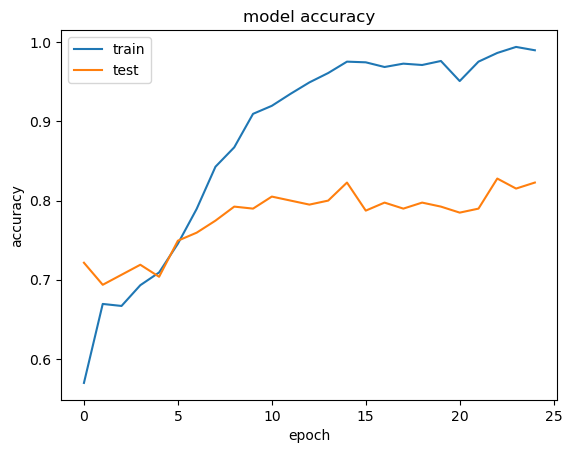

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


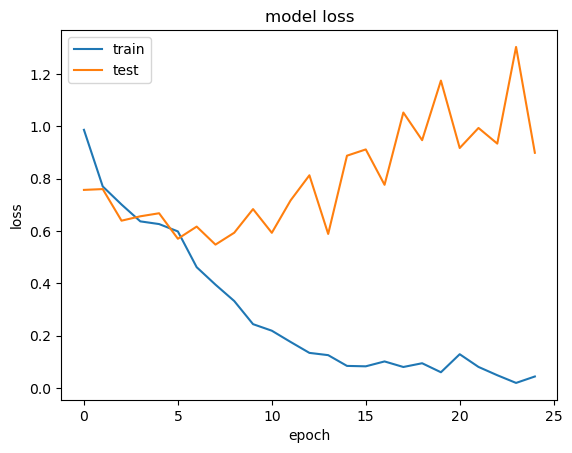

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(np.array(X_test),np.array(y_test))

StatementMeta(, , , Waiting, )

 4/13 [========>.....................] - ETA: 1s - loss: 0.8701 - accuracy: 0.8047

 7/13 [===============>..............] - ETA: 0s - loss: 0.8607 - accuracy: 0.8125

 7/13 [===============>..............] - ETA: 0s - loss: 0.8607 - accuracy: 0.8125

 9/13 [===================>..........] - ETA: 0s - loss: 0.8882 - accuracy: 0.8160

12/13 [==========================>...] - ETA: 0s - loss: 0.9241 - accuracy: 0.8177

13/13 [==============================] - 2s 126ms/step - loss: 0.8991 - accuracy: 0.8228


[0.8990775942802429, 0.8227847814559937]

12/13 [==========================>...] - ETA: 0s - loss: 0.9241 - accuracy: 0.8177

13/13 [==============================] - 2s 126ms/step - loss: 0.8991 - accuracy: 0.8228


13/13 [==============================] - 2s 126ms/step - loss: 0.8991 - accuracy: 0.8228


In [ ]:
predicted = []
for item in model.predict(X_test):
    predicted.append(np.argmax(item))

StatementMeta(, , , Waiting, )

 3/13 [=====>........................] - ETA: 1s

 6/13 [============>.................] - ETA: 0s

 9/13 [===================>..........] - ETA: 0s

 6/13 [============>.................] - ETA: 0s

11/13 [========================>.....] - ETA: 0s

13/13 [==============================] - 2s 131ms/step


13/13 [==============================] - 2s 131ms/step


13/13 [==============================] - 2s 131ms/step


In [ ]:
X_test.shape

StatementMeta(, , , Waiting, )

(395, 128, 128, 1)

In [ ]:
#### lebel of the X_test prediction
# for item in predicted:
#     print(item,)

StatementMeta(, , , Waiting, )

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score


StatementMeta(, , , Waiting, )

In [ ]:
acc = accuracy_score(y_test,predicted)
acc

StatementMeta(, , , Waiting, )

0.8227848101265823

In [ ]:
conf = confusion_matrix(y_test,predicted)
conf

StatementMeta(, , , Waiting, )

array([[213,  24,   4],
       [ 29,  66,   2],
       [  9,   2,  46]])

In [ ]:
import seaborn as sns

StatementMeta(, , , Waiting, )

StatementMeta(, , , Waiting, )

<Axes: >

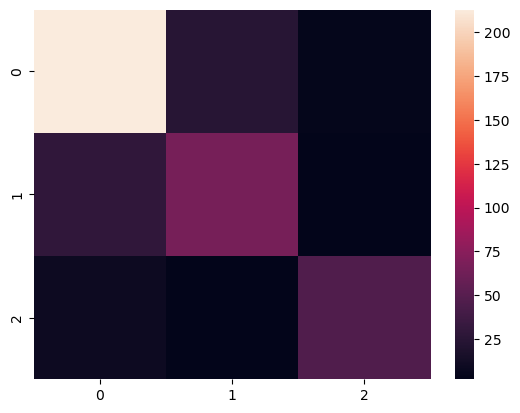

In [ ]:
sns.heatmap(conf)

In [ ]:
X_test.shape

StatementMeta(, , , Waiting, )

(395, 128, 128, 1)

In [ ]:
img = X_test[0]

StatementMeta(, , , Waiting, )

StatementMeta(, , , Waiting, )

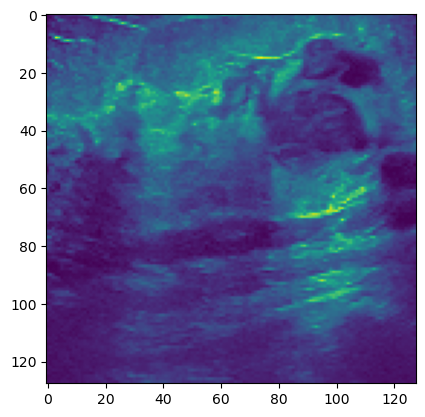

In [ ]:
plt.imshow(img)

In [ ]:
img1=img.reshape(1,X_M.shape[1],X_M.shape[2],1)

StatementMeta(, , , Waiting, )

In [ ]:
img1.shape

StatementMeta(, , , Waiting, )

(1, 128, 128, 1)

In [ ]:
np.argmax(model.predict(img1))

StatementMeta(, , , Waiting, )

1/1 [==============================] - 0s 25ms/step


1

1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 25ms/step


In [ ]:
def image_prediction(img):
#     plt.imshow(img)
    img1=img.reshape(1,128,128,1)
    predict = np.argmax(model.predict(img1))
    if predict==0:
        print("YOU ARE IN NORMAL CONDITION. NO NEED TO WORRY ABOUT")
    elif predict==1:
        print("the cells are not yet cancerous, but they have the potential to become malignant consult the doctor")
    else:
        print("Malignant tumors are cancerous. The cells can grow and spread to other parts of the body.")
        
    

StatementMeta(, , , Waiting, )

In [ ]:
image_prediction(X_test[0])

StatementMeta(, , , Waiting, )

1/1 [==============================] - 0s 20ms/step
the cells are not yet cancerous, but they have the potential to become malignant consult the doctor


1/1 [==============================] - 0s 20ms/step
the cells are not yet cancerous, but they have the potential to become malignant consult the doctor


1/1 [==============================] - 0s 20ms/step
the cells are not yet cancerous, but they have the potential to become malignant consult the doctor


In [ ]:
model.save("/lakehouse/default/Files/Models/breasttumor.h5")

StatementMeta(, , , Waiting, )